#Introduction

##MNIST Data
MNIST is ‘Modified National Institute of Standards and Technology’. This database consists of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems.

#1. Importing Dataset

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

In [ ]:
data

type(data)

tuple

#2. Split the Dataset into Test and Train

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

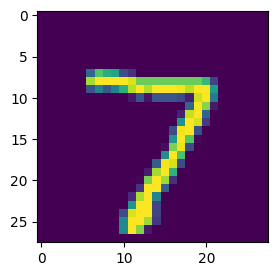

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (4,3)
plt.imshow(X_test[0])
plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import np_utils

print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

(10000,)
(10000, 10)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#3. Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(128, input_dim = 28 * 28, activation= 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation  = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy','AUC'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


#4. Train the model

In [ ]:
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1772 - accuracy: 0.9490 - auc: 0.9966
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1647 - accuracy: 0.9519 - auc: 0.9969
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1551 - accuracy: 0.9557 - auc: 0.9972
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1461 - accuracy: 0.9572 - auc: 0.9975
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9605 - auc: 0.9977


#5. Predicting Accuracy

In [ ]:
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 0s 2ms/step


array([3.60299709e-05, 1.13962815e-05, 1.66274549e-03, 3.12339026e-03,
       3.01264805e-07, 3.17092781e-05, 1.68222645e-08, 9.94935215e-01,
       8.56686620e-06, 1.90693623e-04], dtype=float32)

In [ ]:
[round(i,3) for i in pred[0]]

[0.0, 0.0, 0.002, 0.003, 0.0, 0.0, 0.0, 0.995, 0.0, 0.0]

In [ ]:
max_value = max(pred[0])
index = list(pred[0]).index(max_value)
index

7

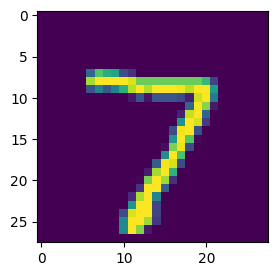

In [ ]:
X_test_plt = X_test.reshape((X_test.shape[0], 28, 28)).astype('float32')

plt.rcParams["figure.figsize"] = (3,3)
plt.imshow(X_test_plt[0])
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1456 - accuracy: 0.9565 - auc: 0.9972
Accuracy:  95.6499993801117
